In [1]:
import multiprocess as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
from tqdm import tqdm
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import datetime
from sklearn.preprocessing import quantile_transform
pd.options.mode.chained_assignment = None  # default='warn'
import gc

In [2]:
%%time
concat_df = pd.read_csv('./prepped_data/총괄표제부_표제부_합친것.csv')
print(concat_df.shape)
concat_df.head()

(680558, 24)
Wall time: 757 ms


,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥내기계식면적,옥외기계식대수,옥외기계식면적,옥내자주식대수,옥내자주식면적,옥외자주식대수,옥외자주식면적,총주차수,epi점수,친환경점수,대장종류
0,서울특별시 강남구 개포동 1163-4,2014,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부
1,서울특별시 강남구 개포동 1163-4,2015,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부
2,서울특별시 강남구 개포동 1163-4,2016,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부
3,서울특별시 강남구 개포동 1163-4,2017,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부
4,서울특별시 강남구 개포동 1163-4,2018,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부


In [3]:
prac_df = concat_df[['총연면적', '총호수']]
prac_df['총호수'] = prac_df['총호수'].apply(lambda x: 1 if x <= 0 else x)
prac_df['총연면적/총호수'] = prac_df['총연면적'] / prac_df['총호수']

In [4]:
prac_df['총연면적/총호수'].describe()

count    680558.000000
mean        113.359637
std        2428.898408
min           0.000000
25%          47.374385
50%          60.677500
75%          77.653077
max      370092.598000
Name: 총연면적/총호수, dtype: float64

<AxesSubplot:>

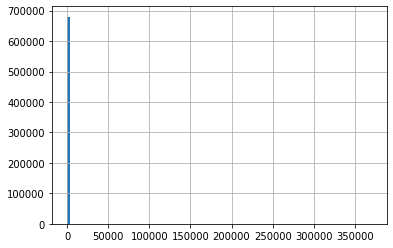

In [11]:
prac_df['총연면적/총호수'].hist(bins=100)

In [8]:
lower_df = prac_df[prac_df['총연면적/총호수'] < 40]
print(lower_df.shape)

(75135, 3)


In [9]:
lower_df.head()

,총연면적,총호수,총연면적/총호수
260,659.88,20,32.9940
261,659.88,20,32.9940
262,659.88,20,32.9940
263,659.88,20,32.9940
306,659.79,20,32.9895


<AxesSubplot:>

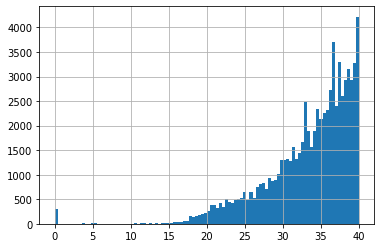

In [10]:
lower_df['총연면적/총호수'].hist(bins=100)

In [21]:
upper_df = prac_df[(prac_df['총연면적/총호수'] > 90)&(prac_df['총연면적/총호수'] < 1000)]
upper_df.shape

(101599, 3)

<AxesSubplot:>

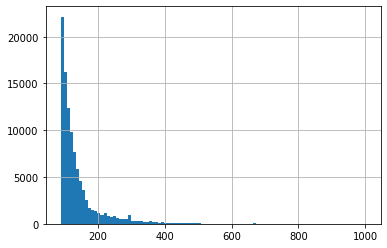

In [22]:
upper_df['총연면적/총호수'].hist(bins=100)

In [23]:
cut_df = prac_df[(prac_df['총연면적/총호수'] > 15)&(prac_df['총연면적/총호수'] < 400)]
print(cut_df.shape)

(677951, 3)


In [24]:
prac_df.shape

(680558, 3)

<AxesSubplot:>

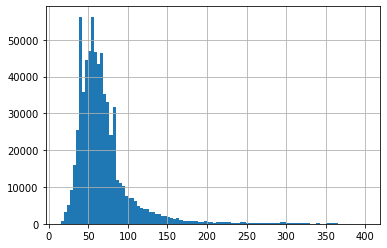

In [25]:
cut_df['총연면적/총호수'].hist(bins=100)

In [26]:
cut_df['총연면적/총호수'].describe()

count    677951.000000
mean         68.795058
std          37.386254
min          15.090000
25%          47.340000
50%          60.595000
75%          77.375000
max         399.956111
Name: 총연면적/총호수, dtype: float64

In [27]:
super_df = cut_df[cut_df['총연면적/총호수'] > 350]
print(super_df.shape)

(974, 3)


In [28]:
super_df.head()

,총연면적,총호수,총연면적/총호수
6674,5906.53,16,369.158125
6675,5906.53,16,369.158125
6676,5906.53,16,369.158125
6677,5906.53,16,369.158125
6678,5906.53,16,369.158125


In [29]:
inv_df = concat_df.loc[super_df.index]
print(inv_df.shape)

(974, 24)


In [30]:
inv_df.head(100)

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥내기계식면적,옥외기계식대수,옥외기계식면적,옥내자주식대수,옥내자주식면적,옥외자주식대수,옥외자주식면적,총주차수,epi점수,친환경점수,대장종류
6674,서울특별시 강남구 논현동 24-11,2014,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6675,서울특별시 강남구 논현동 24-11,2015,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6676,서울특별시 강남구 논현동 24-11,2016,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6677,서울특별시 강남구 논현동 24-11,2017,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6678,서울특별시 강남구 논현동 24-11,2018,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6679,서울특별시 강남구 논현동 24-11,2019,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6680,서울특별시 강남구 논현동 24-11,2020,2011.0,5,2373.6,1115.264,5906.530,4126.640,16,2,1,1779.89,0,0.00,0,0.0,50,1646.66,0,0.0,50,0.0,0.0,총괄표제부
6917,서울특별시 강남구 논현동 249-6,2014,2005.0,0,3062.8,1203.100,15475.250,11013.990,44,1,0,0.00,0,0.00,0,0.0,73,2858.18,0,0.0,73,0.0,0.0,표제부
6918,서울특별시 강남구 논현동 249-6,2015,2005.0,0,3062.8,1203.100,15475.250,11013.990,44,1,0,0.00,0,0.00,0,0.0,73,2858.18,0,0.0,73,0.0,0.0,표제부
6919,서울특별시 강남구 논현동 249-6,2016,2005.0,0,3062.8,1203.100,15475.250,11013.990,44,1,0,0.00,0,0.00,0,0.0,73,2858.18,0,0.0,73,0.0,0.0,표제부


In [31]:
inv_df['총호수'].describe()

count     974.000000
mean       80.068789
std       205.350567
min         0.000000
25%         8.000000
50%        16.000000
75%        29.000000
max      1297.000000
Name: 총호수, dtype: float64

In [32]:
super_df['총호수'].describe()

count     974.000000
mean       80.105749
std       205.336227
min         1.000000
25%         8.000000
50%        16.000000
75%        29.000000
max      1297.000000
Name: 총호수, dtype: float64

In [33]:
below2_df = concat_df[concat_df['총호수'] < 2]
print(below2_df.shape)

(1351, 24)


In [34]:
below2_df.shape[0] / concat_df.shape[0]

0.00198513572685943

In [35]:
concat_df = concat_df.drop(below2_df.index)

In [36]:
concat_df['호수대비연면적'] = concat_df['총연면적'] / concat_df['총호수']
concat_df = concat_df[(concat_df['호수대비연면적'] > 15) & (concat_df['호수대비연면적'] < 400)]
print(concat_df.shape)

(677793, 25)


<AxesSubplot:>

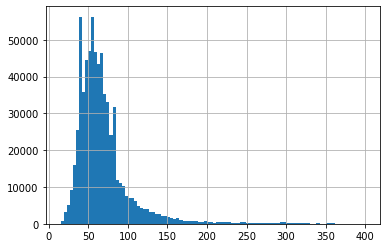

In [37]:
concat_df['호수대비연면적'].hist(bins=100)

In [38]:
max_df = concat_df[concat_df['호수대비연면적'] == concat_df['호수대비연면적'].max()]
print(max_df.shape)

(7, 25)


In [39]:
max_df

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥내기계식면적,옥외기계식대수,옥외기계식면적,옥내자주식대수,옥내자주식면적,옥외자주식대수,옥외자주식면적,총주차수,epi점수,친환경점수,대장종류,호수대비연면적
392370,서울특별시 서초구 방배동 12-1,2014,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111
392371,서울특별시 서초구 방배동 12-1,2015,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111
392372,서울특별시 서초구 방배동 12-1,2016,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111
392373,서울특별시 서초구 방배동 12-1,2017,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111
392374,서울특별시 서초구 방배동 12-1,2018,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111
392375,서울특별시 서초구 방배동 12-1,2019,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111
392376,서울특별시 서초구 방배동 12-1,2020,2012.0,2,1938.0,856.24,7199.21,4641.89,18,1,0,0.0,0,0.0,0,0.0,62,0.0,0,0.0,62,0.0,0.0,표제부,399.956111


In [40]:
lower_df = concat_df[concat_df['호수대비연면적'] < 20]
lower_df.shape

(1286, 25)

In [41]:
lower_df.head(20)

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥내기계식면적,옥외기계식대수,옥외기계식면적,옥내자주식대수,옥내자주식면적,옥외자주식대수,옥외자주식면적,총주차수,epi점수,친환경점수,대장종류,호수대비연면적
3953,서울특별시 강남구 논현동 137-1,2014,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
3954,서울특별시 강남구 논현동 137-1,2015,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
3955,서울특별시 강남구 논현동 137-1,2016,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
3956,서울특별시 강남구 논현동 137-1,2017,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
3957,서울특별시 강남구 논현동 137-1,2018,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
3958,서울특별시 강남구 논현동 137-1,2019,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
3959,서울특별시 강남구 논현동 137-1,2020,2013.0,0,222.0,133.12,443.66,443.66,23,1,0,0.0,0,0.0,0,0.0,4,95.82,2,23.0,6,0.0,0.0,표제부,19.289565
5481,서울특별시 강남구 논현동 182-6,2014,2014.0,0,146.2,87.54,291.90,291.90,16,1,0,0.0,0,0.0,0,0.0,0,0.00,8,92.0,8,0.0,0.0,표제부,18.243750
5482,서울특별시 강남구 논현동 182-6,2015,2014.0,0,146.2,87.54,291.90,291.90,16,1,0,0.0,0,0.0,0,0.0,0,0.00,8,92.0,8,0.0,0.0,표제부,18.243750
5483,서울특별시 강남구 논현동 182-6,2016,2014.0,0,146.2,87.54,291.90,291.90,16,1,0,0.0,0,0.0,0,0.0,0,0.00,8,92.0,8,0.0,0.0,표제부,18.243750


In [43]:
selected_df = concat_df.drop(columns=[col for col in concat_df.columns if '식면적' in col])
selected_df.head()

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥외기계식대수,옥내자주식대수,옥외자주식대수,총주차수,epi점수,친환경점수,대장종류,호수대비연면적
0,서울특별시 강남구 개포동 1163-4,2014,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375
1,서울특별시 강남구 개포동 1163-4,2015,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375
2,서울특별시 강남구 개포동 1163-4,2016,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375
3,서울특별시 강남구 개포동 1163-4,2017,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375
4,서울특별시 강남구 개포동 1163-4,2018,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375


In [44]:
concat_df['호수대비주차수'] = concat_df['총주차수'] / concat_df['총호수']
concat_df['호수대비주차수'].describe()

count    677793.000000
mean          0.661917
std          14.000989
min           0.000000
25%           0.307692
50%           0.666667
75%           0.842105
max        3186.142857
Name: 호수대비주차수, dtype: float64

<AxesSubplot:>

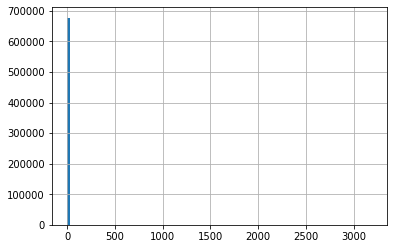

In [45]:
concat_df['호수대비주차수'].hist(bins=100)

In [119]:
upper_df = concat_df[(concat_df['호수대비주차수'] > 1.2) & (concat_df['호수대비주차수'] <= 5)]

<AxesSubplot:>

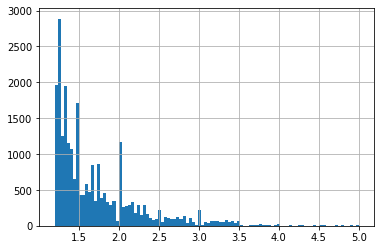

In [120]:
upper_df['호수대비주차수'].hist(bins=100)

In [134]:
super_df = concat_df[concat_df['호수대비주차수'] >= 4]
super_df.shape

(360, 27)

In [124]:
super_df.head(50)

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥내기계식면적,옥외기계식대수,옥외기계식면적,옥내자주식대수,옥내자주식면적,옥외자주식대수,옥외자주식면적,총주차수,epi점수,친환경점수,대장종류,호수대비연면적,호수대비주차수,연면적대비주차수
14294,서울특별시 강남구 도곡동 972-0,2016,2016.0,9,5279.0,1359.8564,21131.2288,13156.2501,110,1,2,128.460,0,0.0,0,0.0,468,20575.9947,0,0.00,468,0.0,0.0,표제부,192.102080,4.254545,0.022147
14295,서울특별시 강남구 도곡동 972-0,2017,2016.0,9,5279.0,1359.8564,21131.2288,13156.2501,110,1,2,128.460,0,0.0,0,0.0,468,20575.9947,0,0.00,468,0.0,0.0,표제부,192.102080,4.254545,0.022147
14296,서울특별시 강남구 도곡동 972-0,2018,2016.0,9,5279.0,1359.8564,21131.2288,13156.2501,110,1,2,128.460,0,0.0,0,0.0,468,20575.9947,0,0.00,468,0.0,0.0,표제부,192.102080,4.254545,0.022147
14297,서울특별시 강남구 도곡동 972-0,2019,2016.0,9,5279.0,1359.8564,21131.2288,13156.2501,110,1,2,128.460,0,0.0,0,0.0,468,20575.9947,0,0.00,468,0.0,0.0,표제부,192.102080,4.254545,0.022147
14298,서울특별시 강남구 도곡동 972-0,2020,2016.0,9,5279.0,1359.8564,21131.2288,13156.2501,110,1,2,128.460,0,0.0,0,0.0,468,20575.9947,0,0.00,468,0.0,0.0,표제부,192.102080,4.254545,0.022147
104745,서울특별시 강서구 방화동 884-0,2014,2005.0,0,3221.7,1084.0000,12375.2400,7812.6200,76,1,3,2299.410,0,0.0,0,0.0,256,8552.2400,108,0.00,364,0.0,0.0,표제부,162.832105,4.789474,0.029414
104746,서울특별시 강서구 방화동 884-0,2015,2005.0,0,3221.7,1084.0000,12375.2400,7812.6200,76,1,3,2299.410,0,0.0,0,0.0,256,8552.2400,108,0.00,364,0.0,0.0,표제부,162.832105,4.789474,0.029414
104747,서울특별시 강서구 방화동 884-0,2016,2005.0,0,3221.7,1084.0000,12375.2400,7812.6200,76,1,3,2299.410,0,0.0,0,0.0,256,8552.2400,108,0.00,364,0.0,0.0,표제부,162.832105,4.789474,0.029414
104748,서울특별시 강서구 방화동 884-0,2017,2005.0,0,3221.7,1084.0000,12375.2400,7812.6200,76,1,3,2299.410,0,0.0,0,0.0,256,8552.2400,108,0.00,364,0.0,0.0,표제부,162.832105,4.789474,0.029414
104749,서울특별시 강서구 방화동 884-0,2018,2005.0,0,3221.7,1084.0000,12375.2400,7812.6200,76,1,3,2299.410,0,0.0,0,0.0,256,8552.2400,108,0.00,364,0.0,0.0,표제부,162.832105,4.789474,0.029414


In [125]:
cut_df = concat_df[concat_df['호수대비주차수'] <= 5]

In [126]:
cut_df.shape

(677531, 27)

In [135]:
cut_df.head()

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥내기계식면적,옥외기계식대수,옥외기계식면적,옥내자주식대수,옥내자주식면적,옥외자주식대수,옥외자주식면적,총주차수,epi점수,친환경점수,대장종류,호수대비연면적,호수대비주차수,연면적대비주차수
0,서울특별시 강남구 개포동 1163-4,2014,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부,55.1375,0.45,0.008161
1,서울특별시 강남구 개포동 1163-4,2015,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부,55.1375,0.45,0.008161
2,서울특별시 강남구 개포동 1163-4,2016,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부,55.1375,0.45,0.008161
3,서울특별시 강남구 개포동 1163-4,2017,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부,55.1375,0.45,0.008161
4,서울특별시 강남구 개포동 1163-4,2018,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0.0,0,0.0,9,138.0,0,0.0,9,0.0,0.0,표제부,55.1375,0.45,0.008161


In [136]:
cut_df.drop(columns=['연면적대비주차수'], inplace=True)

In [137]:
selected_df = cut_df.drop(columns=[col for col in cut_df.columns if '식면적' in col])
selected_df

,지번주소,기준년도,최초사용승인일,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥외기계식대수,옥내자주식대수,옥외자주식대수,총주차수,epi점수,친환경점수,대장종류,호수대비연면적,호수대비주차수
0,서울특별시 강남구 개포동 1163-4,2014,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
1,서울특별시 강남구 개포동 1163-4,2015,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
2,서울특별시 강남구 개포동 1163-4,2016,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
3,서울특별시 강남구 개포동 1163-4,2017,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
4,서울특별시 강남구 개포동 1163-4,2018,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680553,서울특별시 중랑구 중화동 99-3,2016,1997.0,0,0.0,99.34,298.02,198.68,6,1,0,0.0,0,0,0,0,0,0.0,0.0,표제부,49.6700,0.00
680554,서울특별시 중랑구 중화동 99-3,2017,1997.0,0,0.0,99.34,298.02,198.68,6,1,0,0.0,0,0,0,0,0,0.0,0.0,표제부,49.6700,0.00
680555,서울특별시 중랑구 중화동 99-3,2018,1997.0,0,0.0,99.34,298.02,198.68,6,1,0,0.0,0,0,0,0,0,0.0,0.0,표제부,49.6700,0.00
680556,서울특별시 중랑구 중화동 99-3,2019,1997.0,0,0.0,99.34,298.02,198.68,6,1,0,0.0,0,0,0,0,0,0.0,0.0,표제부,49.6700,0.00


In [138]:
selected_df['대장종류'].value_counts()

표제부      636383
총괄표제부     41148
Name: 대장종류, dtype: int64

In [139]:
selected_df.rename(columns={'최초사용승인일':'사용승인년도'}, inplace=True)

In [140]:
selected_df.head()

,지번주소,기준년도,사용승인년도,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥외기계식대수,옥내자주식대수,옥외자주식대수,총주차수,epi점수,친환경점수,대장종류,호수대비연면적,호수대비주차수
0,서울특별시 강남구 개포동 1163-4,2014,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
1,서울특별시 강남구 개포동 1163-4,2015,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
2,서울특별시 강남구 개포동 1163-4,2016,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
3,서울특별시 강남구 개포동 1163-4,2017,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45
4,서울특별시 강남구 개포동 1163-4,2018,2013.0,0,336.1,167.78,1102.75,839.39,20,1,0,0.0,0,0,9,0,9,0.0,0.0,표제부,55.1375,0.45


In [141]:
selected_df.shape

(677531, 22)

In [142]:
selected_df = selected_df.drop_duplicates(subset=['지번주소', '기준년도'])
selected_df.shape

(677531, 22)

In [146]:
selected_df['기준년도'] = selected_df['기준년도'].astype('Int64')
selected_df['사용승인년도'] = selected_df['사용승인년도'].astype('Int64')

In [150]:
def create_full_df_iteratively(df):
    # df is a pandas dataframe
    
    import pandas as pd
    import numpy as np
    import gc
    
    df = df.copy()
    
    dfs_list = []
    count = 0
    for addr in df['지번주소'].unique():
        addr_df = df[df['지번주소'] == addr]
        
        min_record_year = addr_df['기준년도'].min()
        max_record_year = addr_df['기준년도'].max()
        unique_record_years = addr_df['기준년도'].unique()

        unique_approv_years = sorted(list(addr_df['사용승인년도'].unique()))
        min_approved_year = addr_df['사용승인년도'].min()
        max_approved_year = addr_df['사용승인년도'].max()

        if min_approved_year <= 2006:
            min_year = 2006
        else:
            min_year = min_approved_year

        years_for_concat = [y for y in range(min_year, max_record_year) if y not in unique_record_years]
        if years_for_concat == []:
            dfs_list.append(addr_df)
            continue

        rows_list = []
        for y in years_for_concat:
            empty_row = addr_df.iloc[[0],:]
            empty_row['기준년도'] = y
            empty_row.iloc[0, 2:] = np.nan
            rows_list.append(empty_row)

        empty_df = pd.concat(rows_list)

        addr_concat_df = pd.concat([addr_df, empty_df]).sort_values(['기준년도']).reset_index(drop=True)

        addr_concat_df.fillna(method='ffill', inplace=True)
        addr_concat_df.fillna(method='bfill', inplace=True)
        
        dfs_list.append(addr_concat_df)
        count += 1
        if count % 5000 == 0:
            gc.collect()
    
    concat_df = pd.concat(dfs_list).reset_index(drop=True)
    
    return concat_df

In [151]:
def parallelize(df, func, num_processors=6):
    # df is a pandas dataframe
    # func is the function to use
    # num_processors is the number of cpu cores
    
    data_split = []
    unique_addrs = df['지번주소'].unique()
    divided = int(len(unique_addrs) / num_processors)
    for i in range(num_processors):
        if i < (num_processors - 1):
            picked_addrs = unique_addrs[divided*i:divided*(i+1)]
        else:
            picked_addrs = unique_addrs[divided*i:]
        data_split.append(df[df['지번주소'].isin(picked_addrs)])
            
    pool = mp.Pool(num_processors)
    concat_df = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return concat_df

In [152]:
%%time
completed_df = parallelize(selected_df, create_full_df_iteratively)
print(completed_df.shape)
completed_df.head()

(1276270, 22)
Wall time: 14min 31s


,지번주소,기준년도,사용승인년도,총외필지수,대지면적,총건축면적,총연면적,총용적률연면적,총호수,주건축물수,부속건축물수,부속건축물면적,옥내기계식대수,옥외기계식대수,옥내자주식대수,옥외자주식대수,총주차수,epi점수,친환경점수,대장종류,호수대비연면적,호수대비주차수
0,서울특별시 강남구 개포동 1163-4,2013,2013,0.0,336.1,167.78,1102.75,839.39,20.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,표제부,55.1375,0.45
1,서울특별시 강남구 개포동 1163-4,2014,2013,0.0,336.1,167.78,1102.75,839.39,20.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,표제부,55.1375,0.45
2,서울특별시 강남구 개포동 1163-4,2015,2013,0.0,336.1,167.78,1102.75,839.39,20.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,표제부,55.1375,0.45
3,서울특별시 강남구 개포동 1163-4,2016,2013,0.0,336.1,167.78,1102.75,839.39,20.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,표제부,55.1375,0.45
4,서울특별시 강남구 개포동 1163-4,2017,2013,0.0,336.1,167.78,1102.75,839.39,20.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,9.0,0.0,0.0,표제부,55.1375,0.45


In [153]:
%%time
completed_df.to_csv('./prepped_data/new_building_features_2021_0209.csv', index=False)

Wall time: 18.3 s
